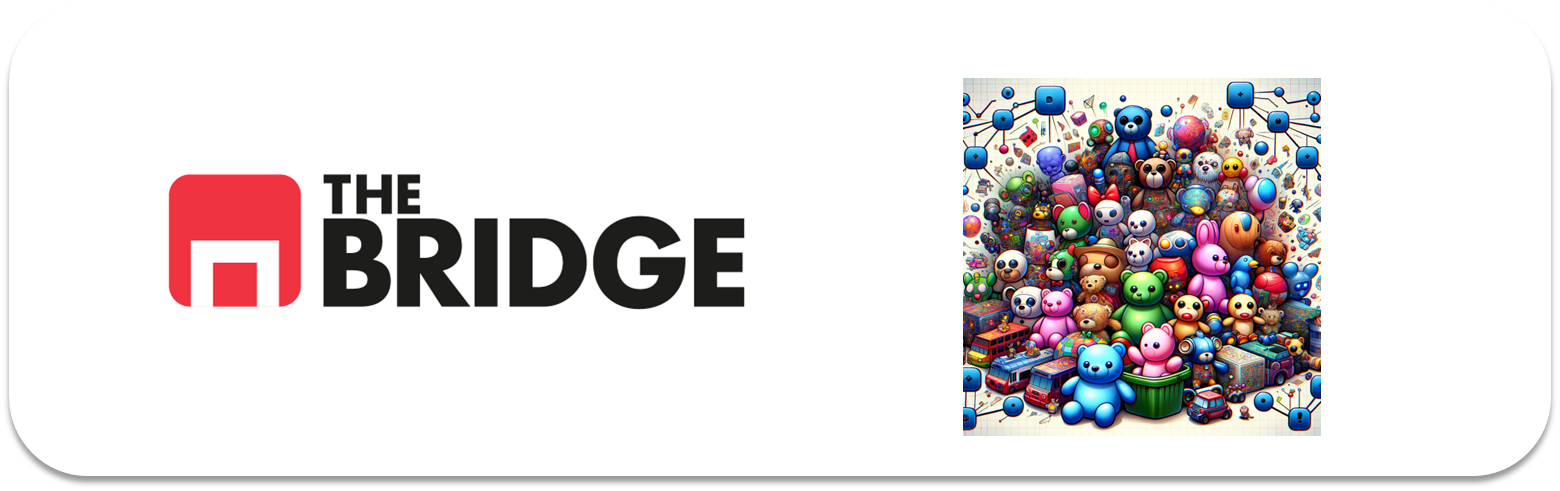

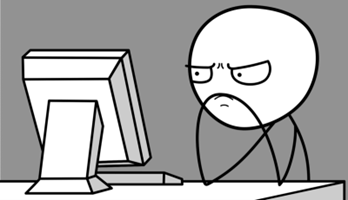

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from toolbox_ML import *
from bootcampviztools import *

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [2]:
df = pd.read_csv('./data/empowering_drinks.csv', sep='|')

In [3]:
df

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


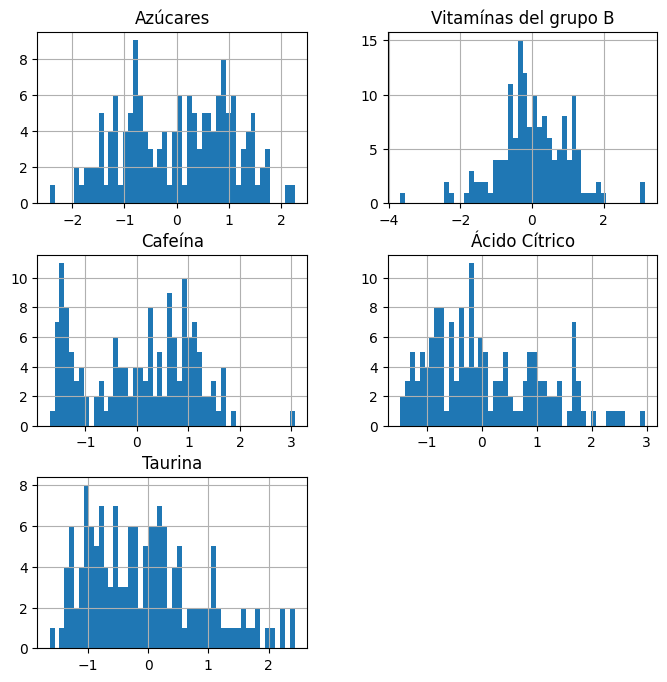

In [5]:
df.hist(bins=50,figsize=(8,8));

In [6]:
cols = ['Azúcares','Vitamínas del grupo B','Cafeína','Ácido Cítrico','Taurina']

In [7]:
tipifica_variables(df[cols], 10, 30.0)

,variable,tipo_sugerido
0,Azúcares,Numérica discreta
1,Vitamínas del grupo B,Numérica discreta
2,Cafeína,Numérica discreta
3,Ácido Cítrico,Numérica discreta
4,Taurina,Numérica discreta


In [9]:
# todas numericas

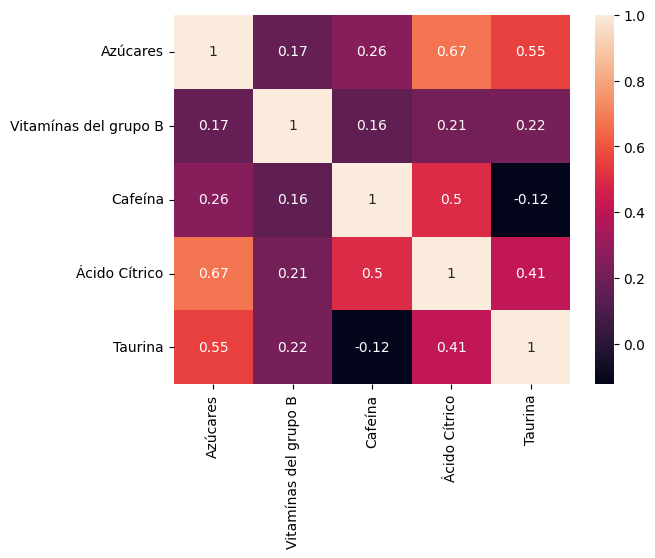

In [8]:
sns.heatmap(df.corr(), annot=True);

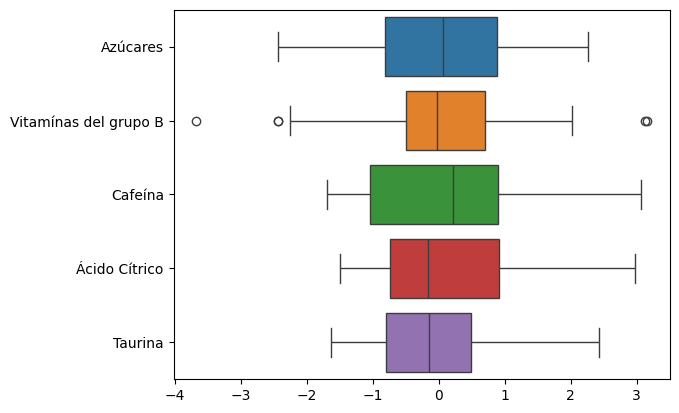

In [9]:
sns.boxplot(df[cols], orient='h');

Azúcares vs Vitamínas del grupo B


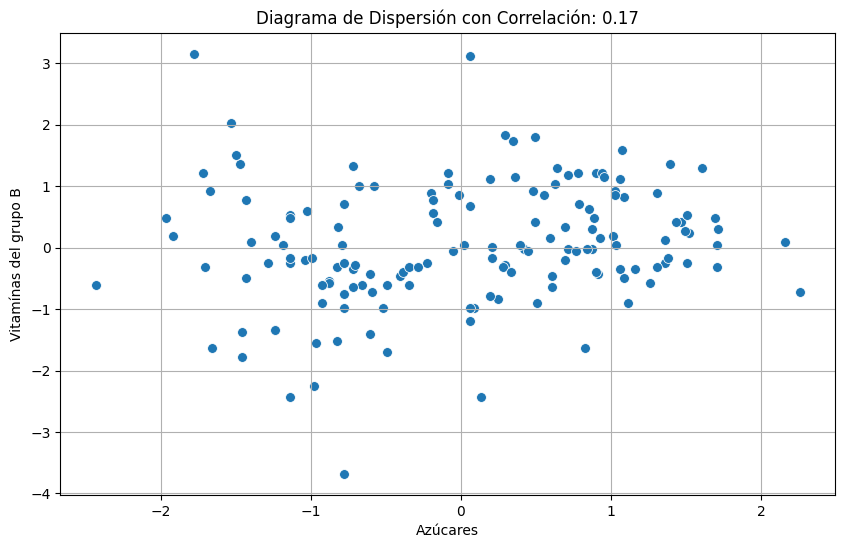

Azúcares vs Cafeína


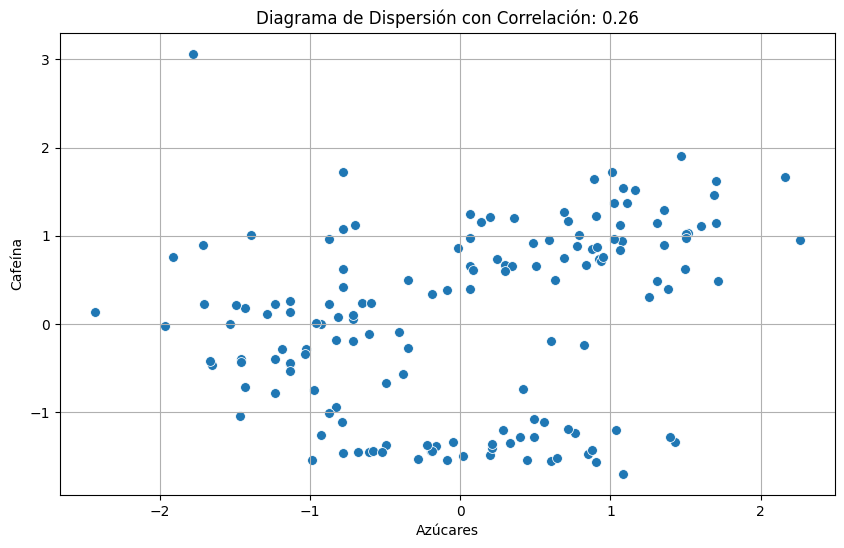

Azúcares vs Ácido Cítrico


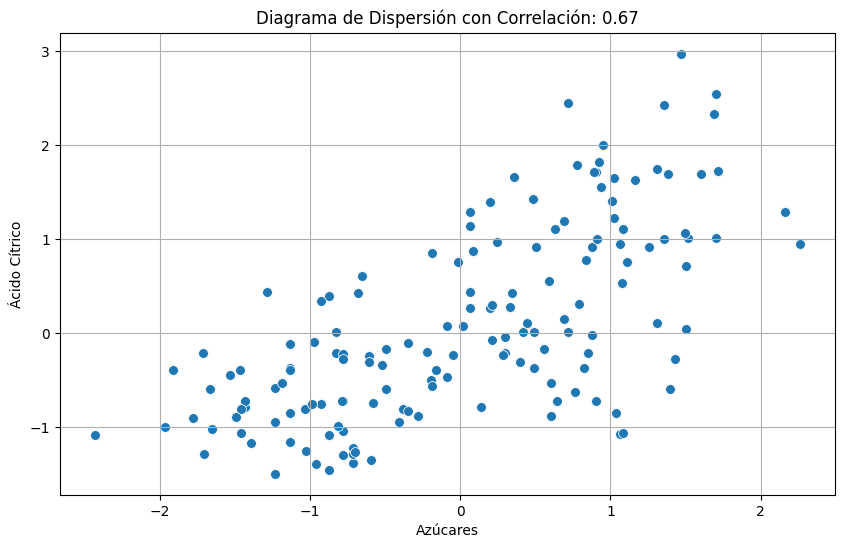

Azúcares vs Taurina


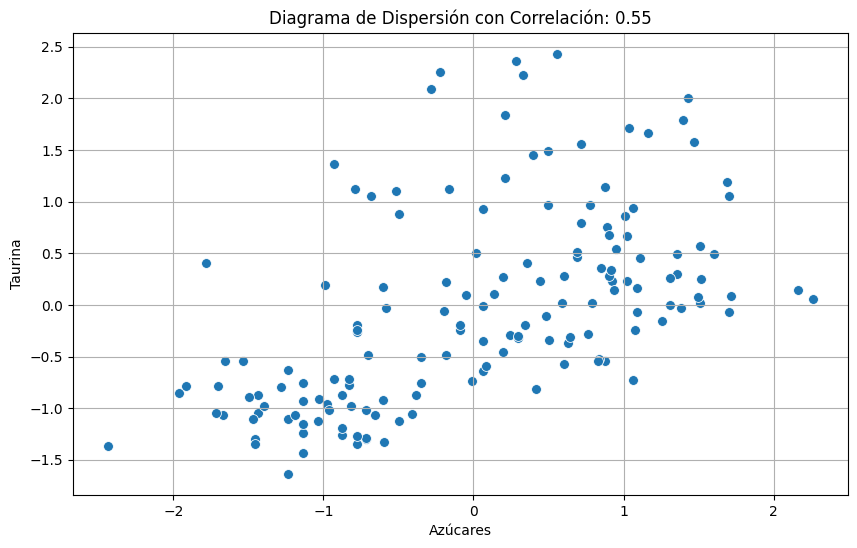

Vitamínas del grupo B vs Cafeína


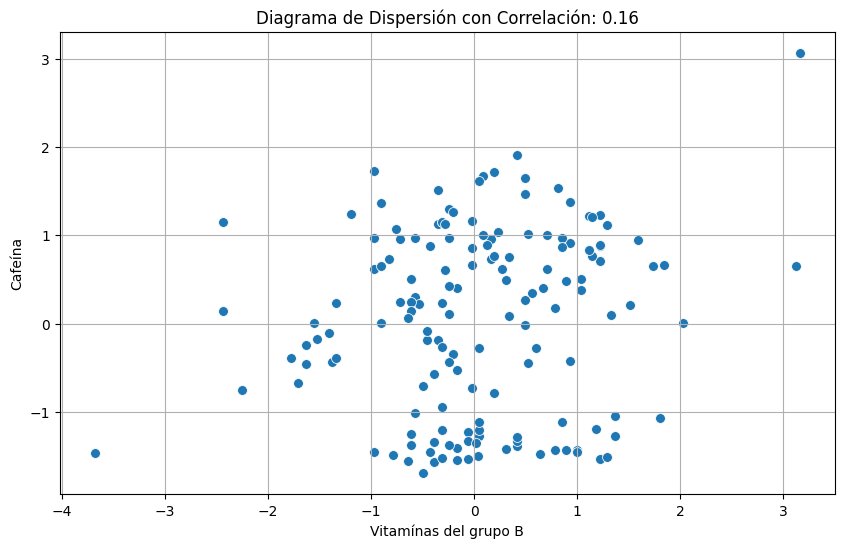

Vitamínas del grupo B vs Ácido Cítrico


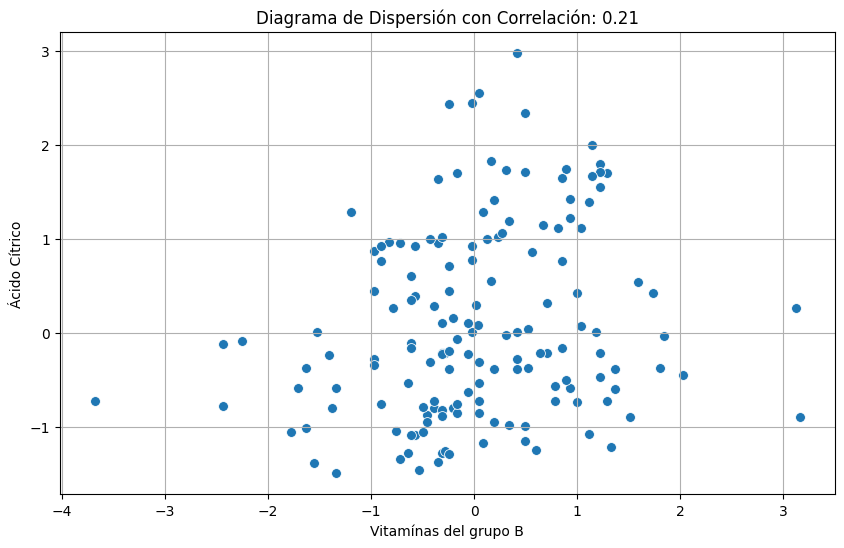

Vitamínas del grupo B vs Taurina


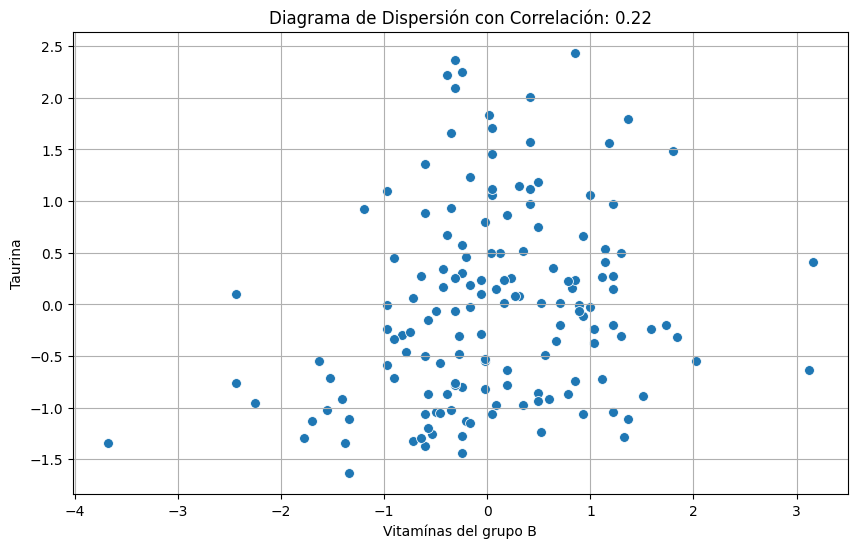

Cafeína vs Ácido Cítrico


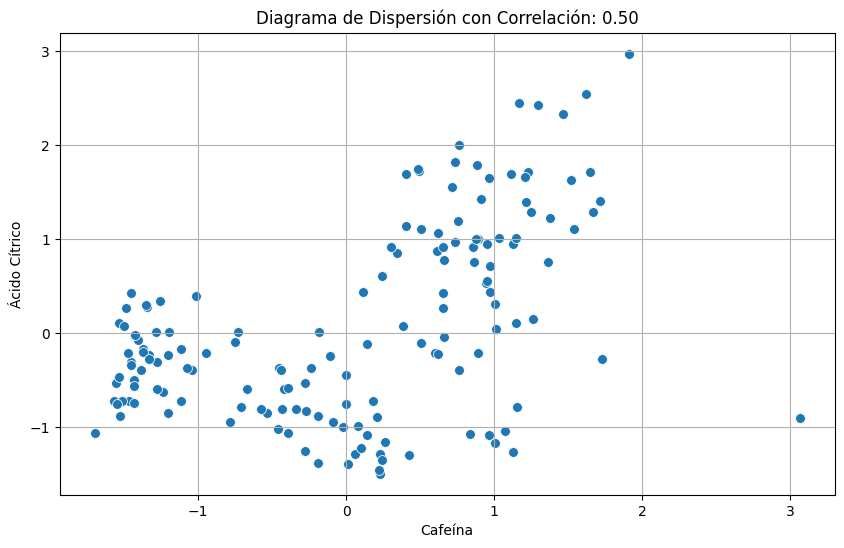

Cafeína vs Taurina


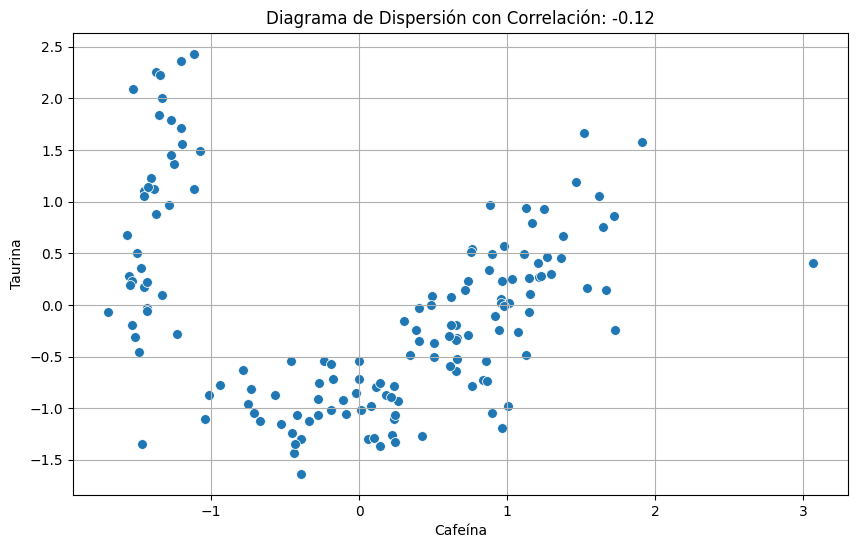

Ácido Cítrico vs Taurina


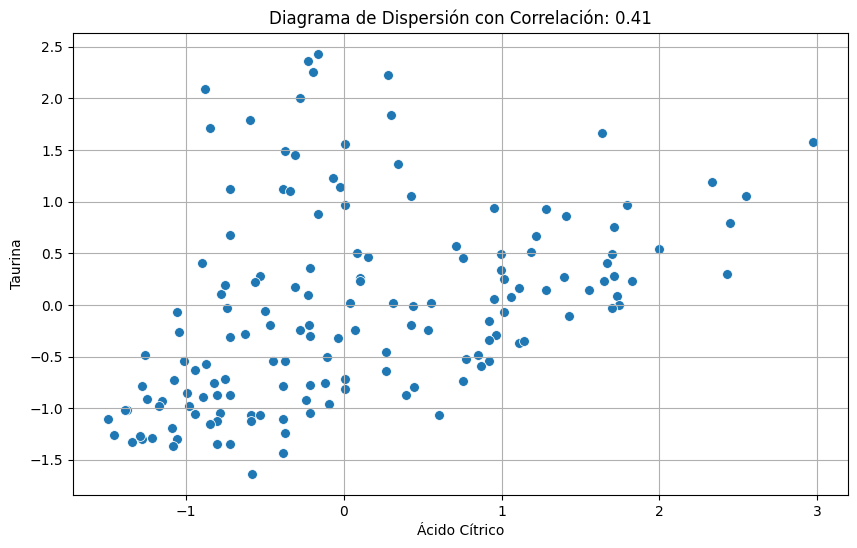

In [10]:
from itertools import combinations

for x, y in combinations(df.columns, r = 2):
    print(f"{x} vs {y}")
    grafico_dispersion_con_correlacion(df, x, y, mostrar_correlacion= True)

+ Azucares VS Vitaminas B: No se ven formaciones claras
+ Azucares VS Cafeína: Quizás dos separaciones una linea superior y otra inferior
+ Azucares VS Acido citrico: Nada concluyente
+ Azucares VS Taurina: Similar a la anterior
+ Vitamina B VS Cafeina: Quizás un grupo pequeño a la izquierda, uno superior y un trazo inferior
+ Vitaminas B VS Ácido Cítrico: Nada Conluyente
+ Vitaminas B VS Taurina: Similar al anterior
+ Cafeina VS Ácido Cítrico: Quizás un cluster a la izquierda, y uno como un trazo o dos en ese trazo diagonal
+ Cafeina VS Taurina: Aquí si que se ven dos agrupaciones separadas por lo menos a la izquierda en vertical y otro que podrían ser dos aunque tampoco está claro. Pero las dos separaciones sí. Estas dos variables parecen mas interesantes
+ Ácido Cítrico VS Taurina: Se podrían ver tres clusters, pero no se ve nada conluyente

In [11]:
df.var()

Azúcares                 1.053049
Vitamínas del grupo B    0.991983
Cafeína                  1.083531
Ácido Cítrico            1.018989
Taurina                  0.873101
dtype: float64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Azúcares,153.0,0.019231,1.026182,-2.434235,-0.816038,0.061000,0.876275,2.259772
Vitamínas del grupo B,153.0,0.037273,0.995984,-3.679162,-0.499016,-0.023821,0.707247,3.156325
Cafeína,153.0,0.041057,1.040928,-1.695971,-1.043392,0.211566,0.894264,3.062832
Ácido Cítrico,153.0,0.080022,1.009450,-1.493188,-0.738463,-0.165254,0.917474,2.971473
Taurina,153.0,-0.044088,0.934399,-1.634288,-0.799428,-0.154899,0.493956,2.431870


In [13]:
# Para este modelo tendríamos que escalar los datos, pero los datos ya están escalados

In [14]:
# Primero haremos DBSCAN y luego clustering jerárquico

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
valores = []

for x in np.linspace(0.1, 3, 20):
    dbscan = DBSCAN(eps= x)
    dbscan.fit(df)

    anomalias = np.sum(dbscan.labels_ == -1) * 100 / len(dbscan.labels_)
    valores.append(anomalias)

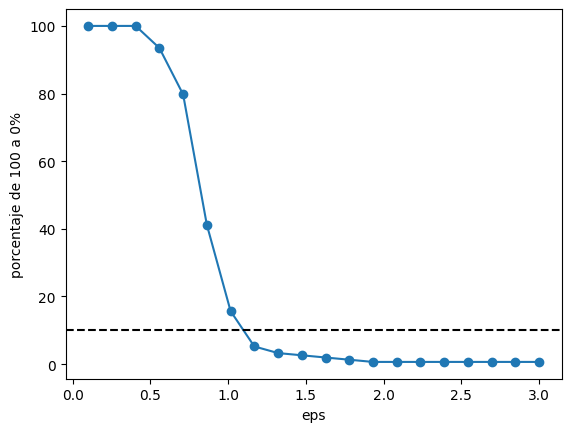

In [15]:
plt.plot(np.linspace(0.1, 3, 20), valores, marker='o')
plt.ylabel('porcentaje de 100 a 0%')
plt.xlabel('eps')
plt.axhline(y=10, color='black', ls='--')
plt.show()

In [24]:
# voy a usar eps=1

In [16]:
dbscan = DBSCAN(eps=1)
dbscan.fit(df)

DBSCAN(eps=1)

In [17]:
clusters = dbscan.labels_
clusters

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  1, -1,  1,  1,  0, -1, -1, -1,  1, -1,  1,
        0, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2])

In [18]:
# vamos a mirar la cantidad de clusters que tenemos
cantidad = len(set([x for x in clusters if x != -1]))
cantidad

3

In [29]:
# con el dbscan tenemos 3 clusters, es el mínimo que nos decian en el enunciado

In [19]:
df['dbscan'] = clusters

In [20]:
media_db = df.loc[df['dbscan']!= -1].groupby('dbscan')[cols].mean()

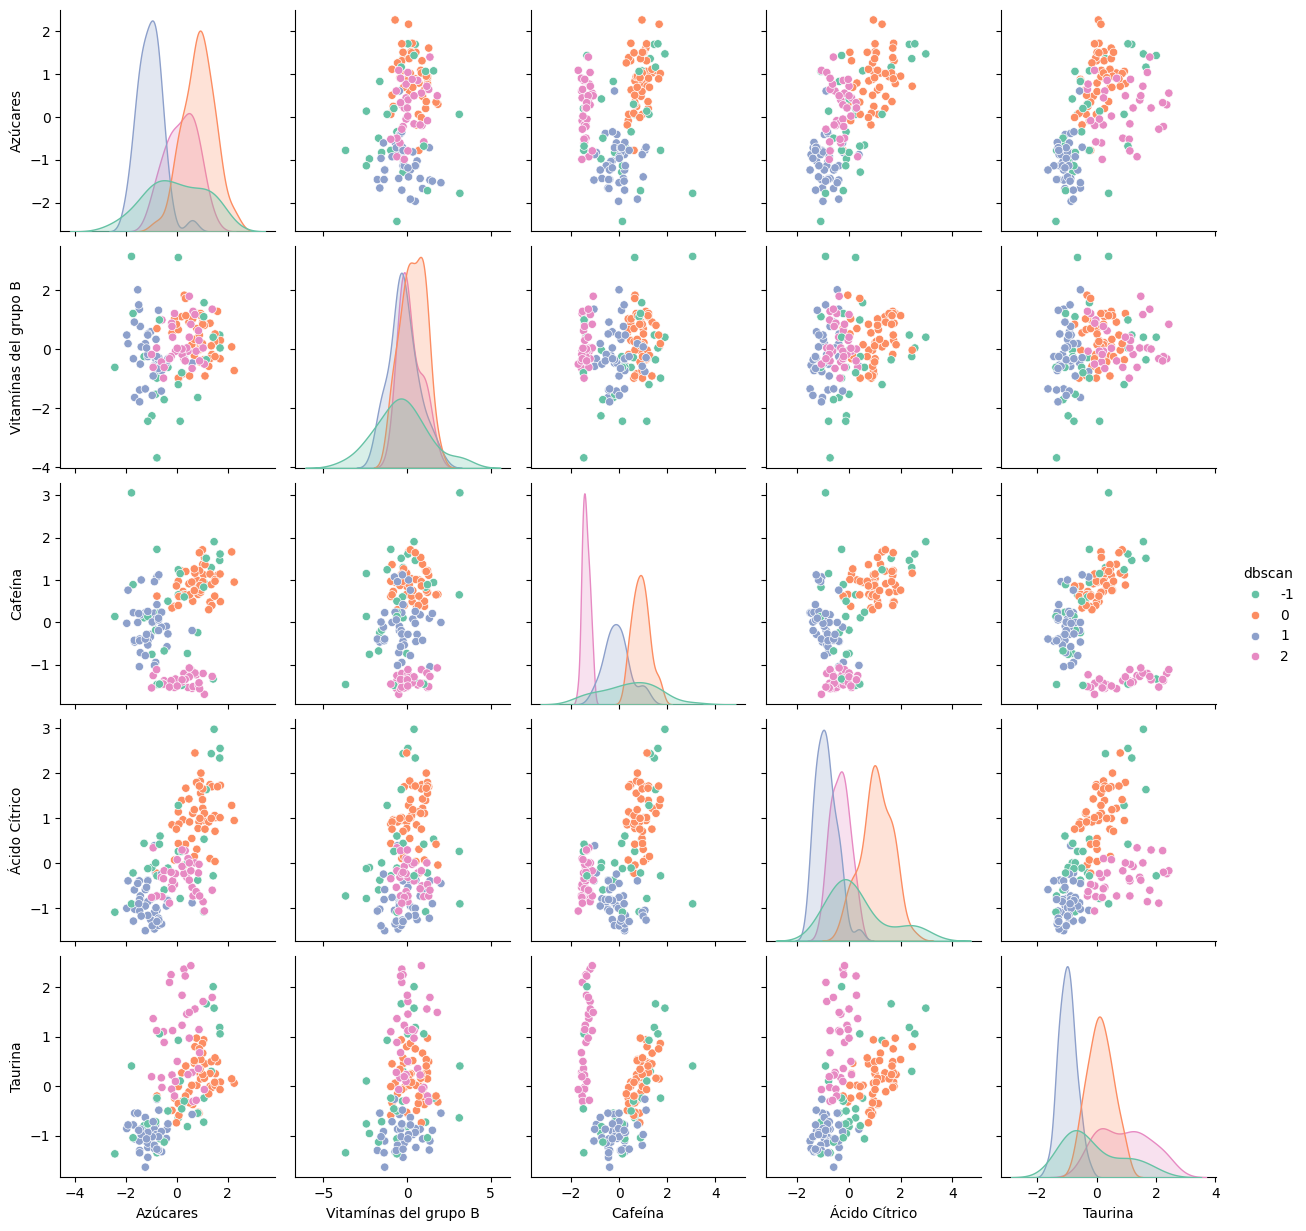

In [21]:
df_plot = df[cols].copy()
df_plot['dbscan'] = df['dbscan']
sns.pairplot(df_plot, hue="dbscan", palette="Set2");

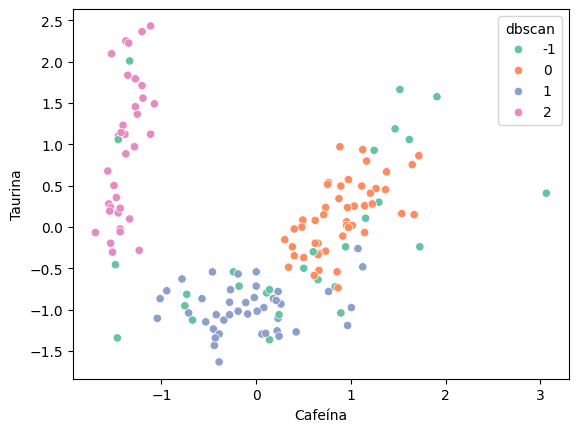

In [22]:
sns.scatterplot(data = df[["Cafeína","Taurina","dbscan"]], x= "Cafeína", y = "Taurina", 
                hue = "dbscan", palette="Set2");

In [35]:
# Ahora toca con el clustering jerárquico

In [23]:
import scipy.cluster.hierarchy as shc

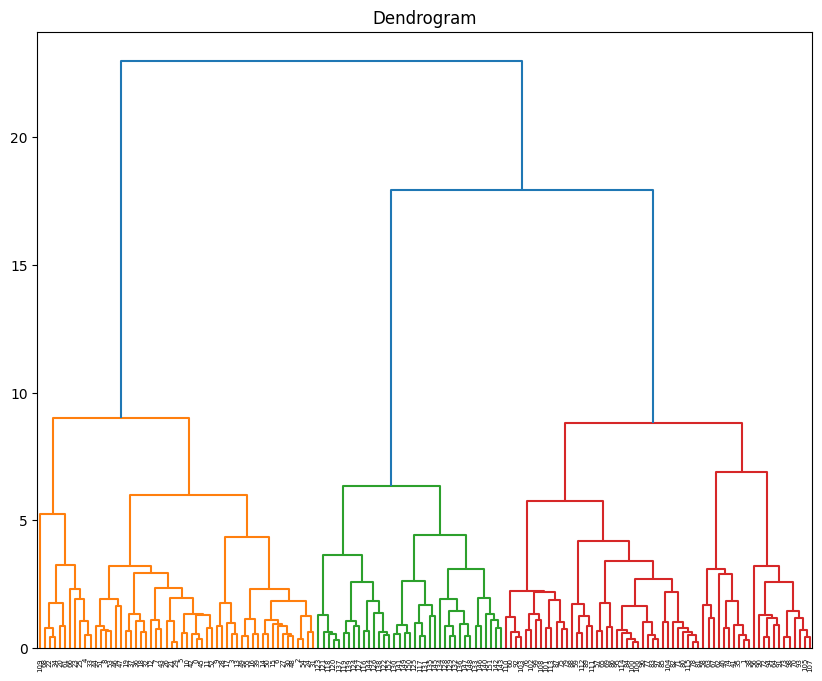

In [24]:
plt.figure(figsize=(10,8))
clusters = shc.linkage(df[cols], method= 'ward')
shc.dendrogram(Z= clusters)

plt.title('Dendrogram')
plt.show()

In [41]:
# vamos hacer 3 clusters, ya que es lo nos sale dividido el endograma

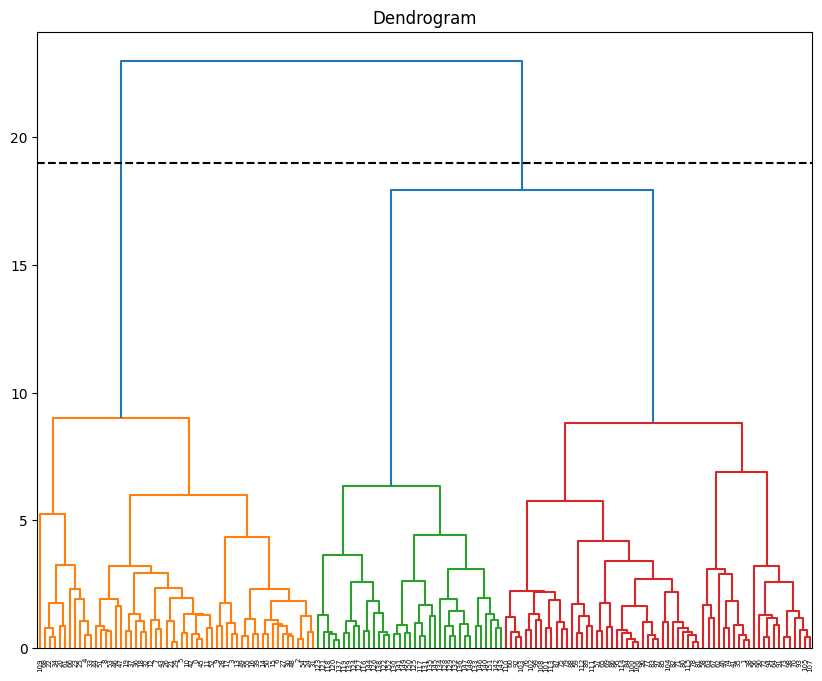

In [25]:
plt.figure(figsize=(10,8))
clusters = shc.linkage(df[cols], method= 'ward')
shc.dendrogram(Z= clusters)

plt.title('Dendrogram')
plt.axhline(y=19, color ='black', ls='--')
plt.show()

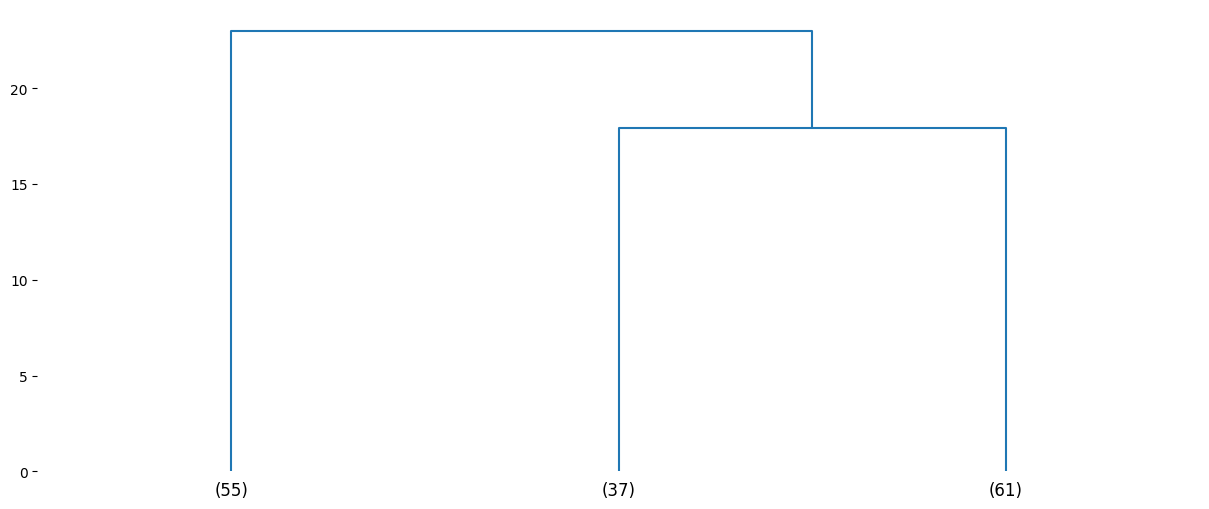

In [26]:
#Miramos cuantos elementos hay en cada cluster
plt.figure(figsize =(15,6))
dend = shc.dendrogram(clusters,
                 truncate_mode='lastp',
                 p = 3)
sns.despine(left=True, bottom=True)

In [27]:
# vamos a montar el clustering
from sklearn.cluster import AgglomerativeClustering

In [28]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering_model.fit(df[cols])
clustering_model.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# hacemos la asignacion
df['jerarquico'] = clustering_model.labels_

In [30]:
media_jerar = df.groupby('jerarquico')[cols].mean()

In [31]:
# PARA DBSACN
media_db

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
dbscan,,,,,
0,0.859132,0.343205,0.909835,1.056747,0.121504
1,-1.057503,-0.202237,-0.075281,-0.877898,-0.982138
2,0.182581,0.188749,-1.378977,-0.341587,0.938663


In [32]:
# PARA CLUSTERING JERÁRQUICO
media_jerar

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
jerarquico,,,,,
0,0.891996,0.520492,1.020946,1.102175,0.230639
1,-0.873346,-0.491226,0.021142,-0.609412,-0.884453
2,0.193422,0.190284,-1.382700,-0.302761,0.933003


In [92]:
df

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,dbscan,jerarquico
0,1.518613,0.232053,1.034819,1.013009,0.251717,0,0
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,0,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,0,0
3,1.691550,0.487926,1.466525,2.334574,1.186068,-1,0
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0,0
...,...,...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783,2,2
149,0.332758,-0.389355,-1.344582,0.280575,2.224236,2,2
150,0.209232,0.012732,-1.354622,0.296498,1.834923,2,2
151,1.395086,1.365208,-1.274305,-0.595160,1.791666,2,2


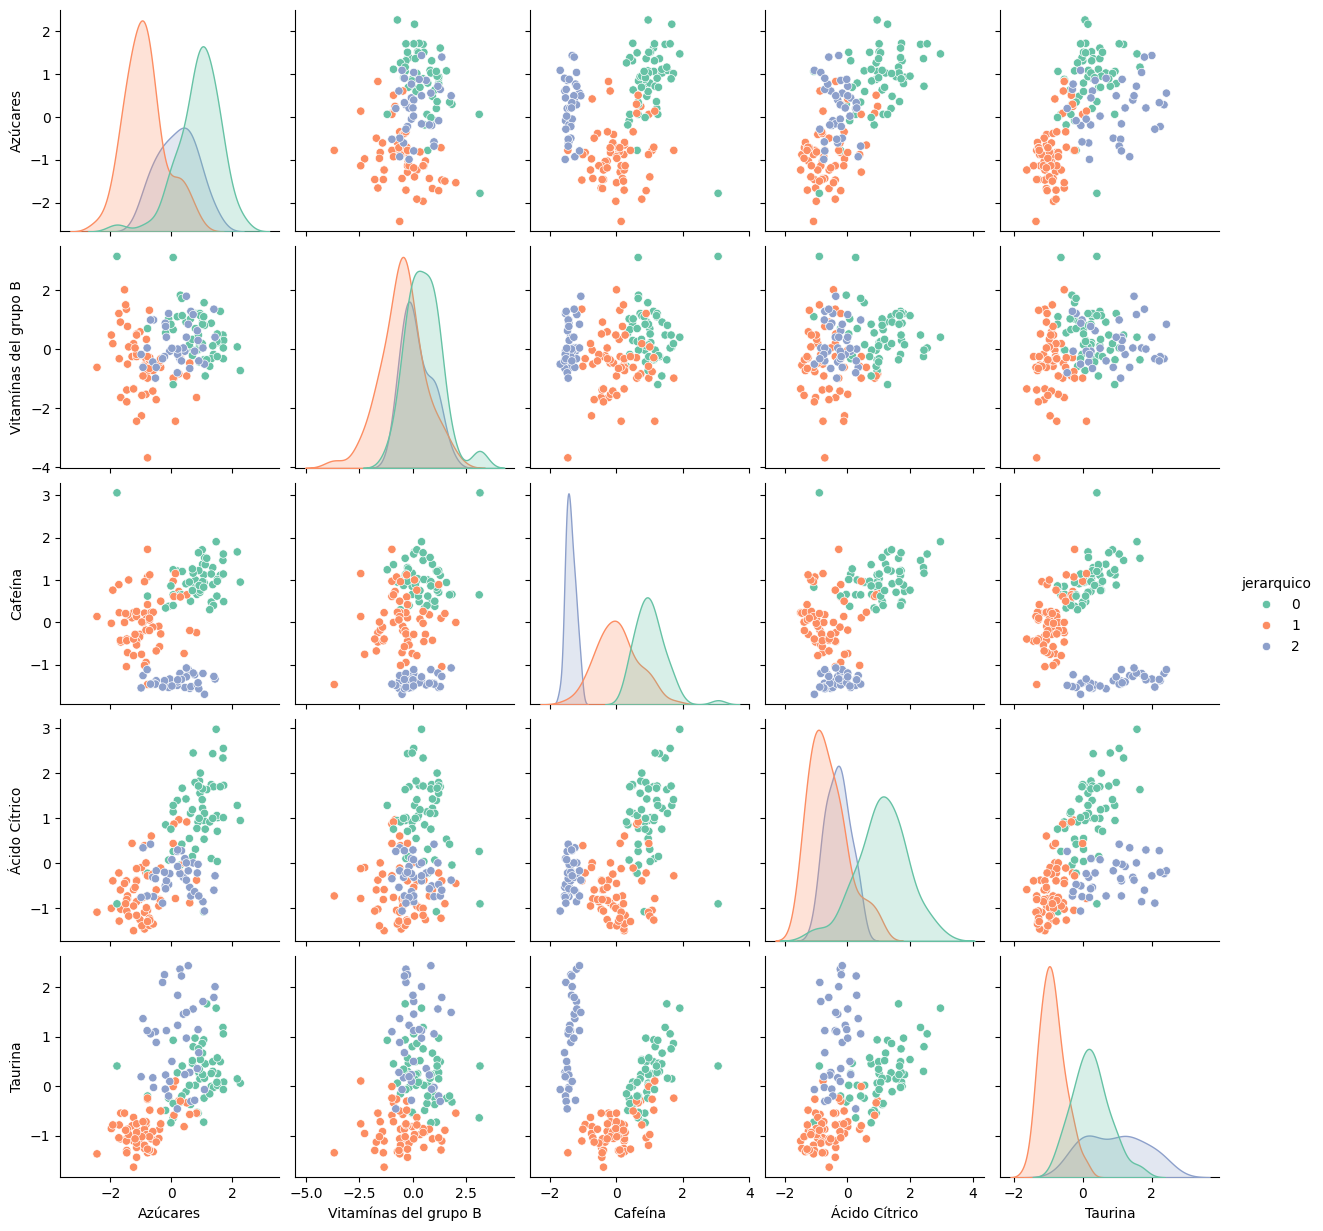

In [33]:
df_plot2 = df[cols].copy()
df_plot2['jerarquico'] = df['jerarquico']
sns.pairplot(df_plot2, hue="jerarquico", palette="Set2");

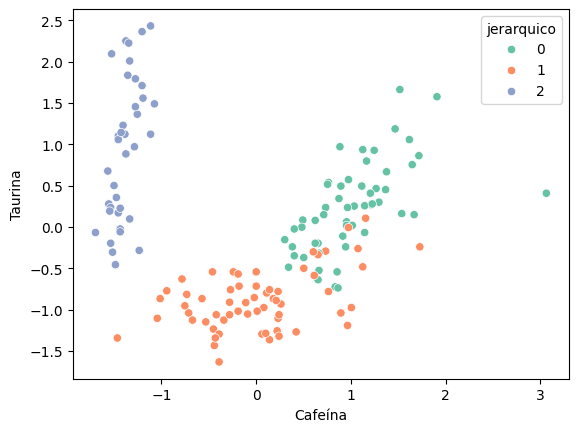

In [34]:
sns.scatterplot(data = df[["Cafeína","Taurina","jerarquico"]], x= "Cafeína", y = "Taurina", 
                hue = "jerarquico", palette="Set2");

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [67]:
df2 = pd.read_csv("./data/new_experiments.csv", sep='|')

In [68]:
df2

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 368.0 bytes


In [70]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Azúcares,6.0,0.028059,1.205271,-1.680724,-0.766628,0.165997,0.876275,1.481555
Vitamínas del grupo B,6.0,0.085839,0.826463,-1.412851,-0.106066,0.323436,0.561033,0.890014
Cafeína,6.0,-0.348982,1.139233,-1.565455,-1.211557,-0.561488,0.352122,1.366128
Ácido Cítrico,6.0,0.106490,1.157346,-1.193845,-0.368265,-0.149331,0.212905,2.239039
Taurina,6.0,-0.032337,1.143657,-0.976782,-0.704263,-0.593957,0.418256,1.956043


In [71]:
# voy a usr el CLUSTERING JERÁRQUICO

In [72]:
# seguimos sin necesitar de escalar los datos porque ya están

In [74]:
predict = dbscan.predict(df2)

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [ ]:
KNN + GridSearch

In [150]:
df2['kmenas'] = predict

In [151]:
df2

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,kmenas
0,1.481555,0.305159,1.366128,2.239039,0.731870,1
1,0.616869,0.890014,0.583034,0.312420,-0.665332,1
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,0
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,0
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,0
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043,2


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.